In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### Visualising the Data

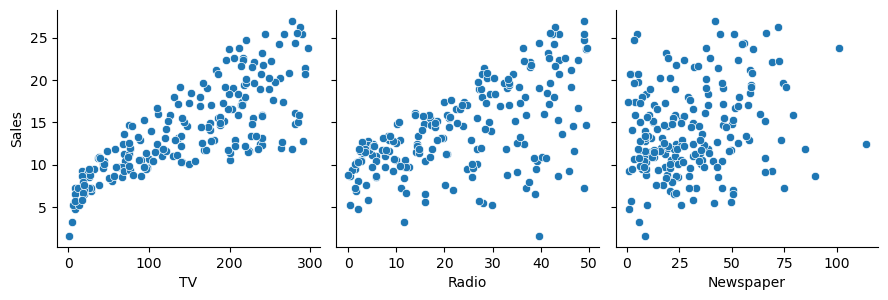

In [8]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter',height=3)
plt.show()

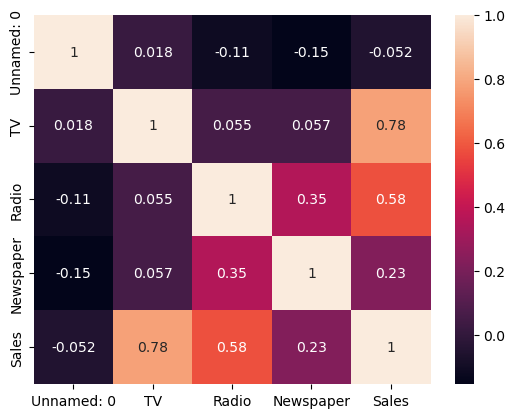

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Performing Linear Regression

In [10]:
X = df['TV'] # Feature Variable
y = df['Sales'] # Response variable

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state = 20)

In [12]:
X_train.head()

134     36.9
62     239.3
20     218.4
21     237.4
45     175.1
Name: TV, dtype: float64

In [13]:
y_train.head()

134    10.8
62     15.7
20     18.0
21     12.5
45     14.9
Name: Sales, dtype: float64

#### Building a Linear Model

In [14]:
import statsmodels.api as sm

In [15]:
# Adding an constant to the intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regerssion line with ordinary least squares
lr = sm.OLS(y_train,X_train_sm).fit()

In [16]:
# printing the parameters
lr.params

const    7.298068
TV       0.045051
dtype: float64

In [17]:
# Getting the Summary from the lr.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           6.69e-28
Time:                        15:11:26   Log-Likelihood:                -361.35
No. Observations:                 140   AIC:                             726.7
Df Residuals:                     138   BIC:                             732.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2981      0.557     13.101      0.0

#### From the parameters that we get, our linear regression equation becomes:
#### Sales = 7.2981 + 0.045 * TV

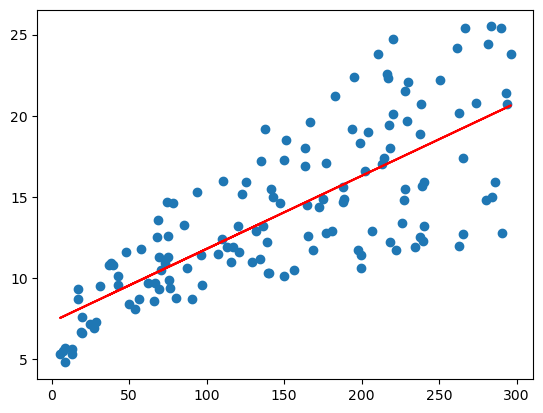

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,7.2981+0.045*X_train,'r')
plt.show()

##### To validate assumptions of the model, and hence the reliability for inference
##### We need to check if the error terms are also normally distributed , let us plot the histogram of the error terms.

In [19]:
y_train_predict = lr.predict(X_train_sm)
res = (y_train - y_train_predict)

C:\Users\mahar\AppData\Local\Temp\ipykernel_10452\786775153.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


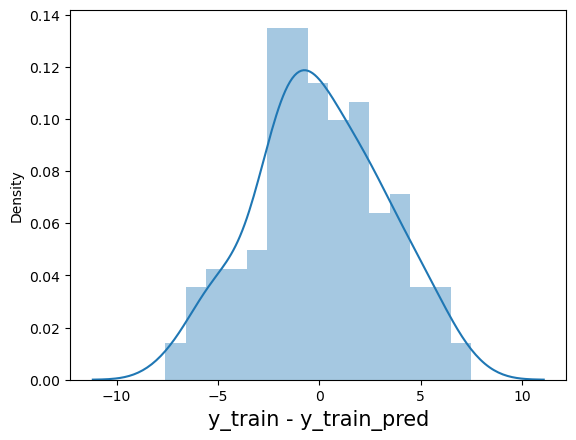

In [20]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

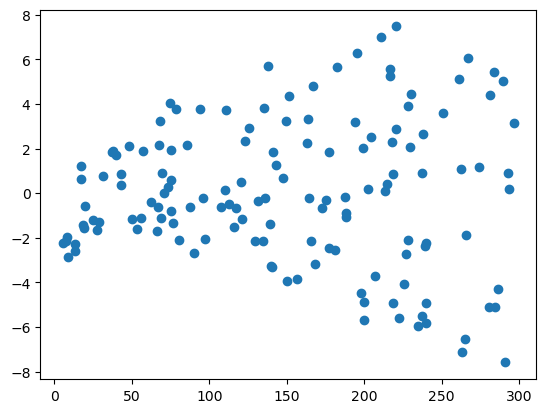

In [21]:
plt.scatter(X_train,res)
plt.show()

#### Let us Do predections on the Test size

In [22]:
y_test_sm = sm.add_constant(y_test)
y_pred = lr.predict(y_test_sm)

In [23]:
lr.params

const    7.298068
TV       0.045051
dtype: float64

In [24]:
y_pred.head()

150    8.023394
28     8.149538
13     7.735066
178    7.829673
109    8.190084
dtype: float64

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [26]:
np.sqrt(mean_squared_error(y_test,y_pred))

8.197786523991807

##### Checking R-Squared on the test set

In [27]:
r_squared = r2_score(y_test,y_pred)
r_squared

-1.0196657284703585

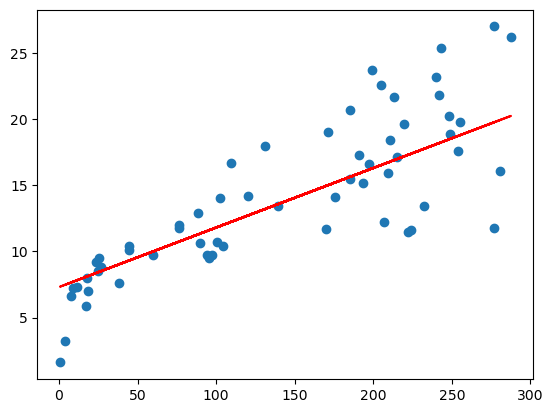

In [28]:
plt.scatter(X_test,y_test)
plt.plot(X_test,7.2981+0.045*X_test,'r')
plt.show()